In [1]:
import sys 
import os
sys.path.append(os.path.abspath("../"))
from sandbox.PCT_node import PCT_node

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import math


PCT Nodes Basic To Do:
1. framework for running experiments (calls update and refence functions)
2. nodes have parents from which they get reference signals (function for asking parent for reference)
3. node have children from which they get feedback (function for asking child for input)
4. customizable update methods

Next:
1. sample algorithms for:
- compression
- decompression
- integration of information from difference sources
2. Effective PID update algorithms
3. 

### PCT Node
Each node takes a sensor, comparator, and control update function. The controller/effector is a [PID controller](https://en.wikipedia.org/wiki/PID_controller) and updates are done on the each parameter `Kp` (proportional), `Ki` (integral), and `Kd` (derivative) in keeping with the [robotics using PCT](https://www.sciencedirect.com/science/article/pii/S2589004221009160). Below is an example of a single node taking a sin wave as a reference signal and performing that behavior using basic control update rules. The behavioral output is fedback as sensory data. 

Users can supply custom functions to each of these to make their own custom nodes and can run the "go" function to run each of these in sequence (i.e. sense data, compare to a reference signal, generate behavior and update the controller). Some pieces are still missing:
- basic hierarchy is possible, but I need safety checks for state sizes and nodes should return all their information (perception, error) rather than just behavior output so that other data can be passed around the network
- more checks and catches so that valid inputs and outputs are sent around
- built in functions to allow for out-of-the-box experiments

In [2]:

def sensor(observation):
    return observation

def comparator(ref, sens):
    error = sens - ref
    return error 

def control_update(error, Kp, Ki, Kd):
    if error < -0.1:
        Kp += error*0
    if error != 0:
        Ki += error*0.1
    if error > 0.1:
        Kd += error*0
    return Kp, Ki, Kd



In [3]:
reference_signal = [0.7]

node = PCT_node(sensor=sensor, comparator=comparator, Kp = [0], Kd = [0], Ki = [0], control_update=control_update)
time_limit = 30
time = [t for t in range(time_limit)]
behavior = np.array([0])
behaviors = []

for t in time:
    behaviors.append(behavior)
    behavior = node.go(np.array(reference_signal), behavior)

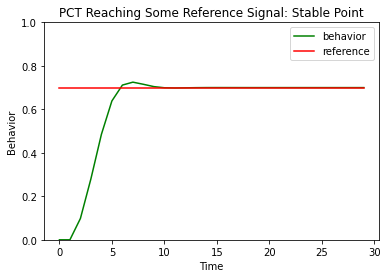

In [4]:
plt.figure(facecolor='white') 
plt.plot(time, behaviors, 'g', label='behavior')
plt.plot(time, [reference_signal for _ in time], 'r', label='reference')
#plt.plot([time[0], time[-1]], [reference_signal, reference_signal], 'r')
#plt.title(f"Reaching Some Reference Signal: {reference_signal}")
plt.title("PCT Reaching Some Reference Signal: Stable Point")
plt.legend()
plt.ylim(0,1)
plt.ylabel("Behavior")
plt.xlabel("Time")
plt.show()

In [5]:
node = PCT_node(sensor=sensor, comparator=comparator, Kp = [0], Kd = [0], Ki = [0], control_update=control_update)
time_limit = 30
time = [t for t in range(time_limit)]
reference_signal = [np.sin([t])[0]+1 for t in time]
behavior = np.array([0])
behaviors = []

for t in time:
    behaviors.append(behavior)
    behavior = node.go(np.array([reference_signal[t]]), behavior)
 




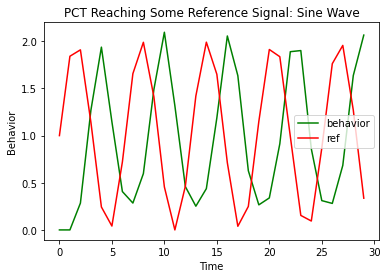

In [6]:
plt.figure(facecolor='white') 
plt.plot(time, behaviors, 'g', label='behavior')
plt.plot(time, reference_signal, 'r', label='ref')
#plt.plot([time[0], time[-1]], [reference_signal, reference_signal], 'r')
#plt.title(f"Reaching Some Reference Signal: {reference_signal}")
plt.title("PCT Reaching Some Reference Signal: Sine Wave")
plt.legend()
plt.ylabel("Behavior")
plt.xlabel("Time")
plt.show()